In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [36]:
data = pd.read_csv('cleaned.1600000.tweets.csv')
data.head()

,Unnamed: 0,text,new_target
0,509846,morning strict orders feet knit mind body feel...,Negative
1,602894,emorethan,Negative
2,1384873,hacking cool tetris th birthday today yay some...,Positive
3,874947,hey climb debuted vh top countdown congrads,Positive
4,458741,new post tomorrow breastfeeding journey ending,Negative


In [37]:
data.shape

(1600000, 3)

In [38]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [39]:
data.dropna(axis = 0, inplace = True)

In [40]:
data.head()

,text,new_target
0,morning strict orders feet knit mind body feel...,Negative
1,emorethan,Negative
2,hacking cool tetris th birthday today yay some...,Positive
3,hey climb debuted vh top countdown congrads,Positive
4,new post tomorrow breastfeeding journey ending,Negative


In [63]:
X = data['text'][:25000]
y = data['new_target'][:25000]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
print(X_train.shape, X_test.shape)

(20000,) (5000,)


In [65]:
tfidf = TfidfVectorizer(ngram_range = (1, 2), max_features = 8000)
X_train_1 = tfidf.fit_transform(X_train)


In [66]:
X_train_1.shape

(20000, 8000)

In [67]:
X_test_1 = tfidf.transform(X_test)

In [68]:
X_test_1.shape

(5000, 8000)

### XGBoost

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [70]:
xgbc = XGBClassifier(max_depth = 6, n_estimators =1000, nthread = 3)


In [71]:
xgbc.fit(X_train_1, y_train)

XGBClassifier(max_depth=6, n_estimators=1000, nthread=3)

In [72]:
y_pred = xgbc.predict(X_test_1)

In [73]:
def evaluate_model(model):
    
    # Classification Report
    y_pred = model.predict(X_test_1)
    print(classification_report(y_pred, y_test))
    print('*'*50)
    
    #Accuracy Score
    print("Accuracy Score :", accuracy_score(y_pred, y_test))
    print("*"*50)
    
    # Confusion Matrix Heatmap
    cnf_matrix = confusion_matrix(y_pred, y_test)
    labels = ['Positive', 'Negative']
    plt.figure(figsize = (5,5))
    sns.heatmap(cnf_matrix, 
              annot = True, 
              cmap = "Blues", 
              fmt = '',
              xticklabels = labels,
              yticklabels = labels)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()

              precision    recall  f1-score   support

    Negative       0.67      0.75      0.71      2193
    Positive       0.78      0.71      0.75      2807

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000

**************************************************
Accuracy Score : 0.728
**************************************************


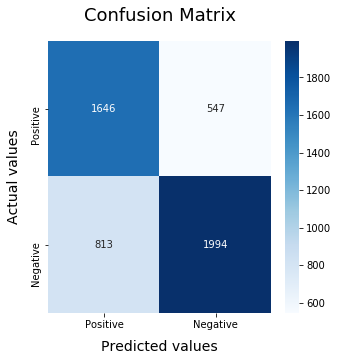

In [74]:
evaluate_model(xgbc)

### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier 

In [76]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train_1,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [77]:
y_pred = rf.predict(X_test_1)

              precision    recall  f1-score   support

    Negative       0.72      0.73      0.72      2399
    Positive       0.75      0.73      0.74      2601

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000

**************************************************
Accuracy Score : 0.7324
**************************************************


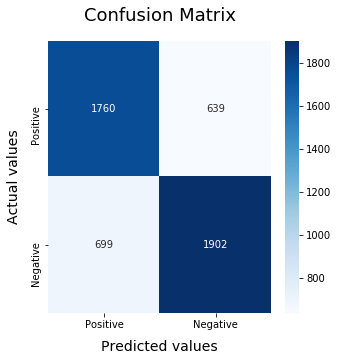

In [78]:
evaluate_model(rf)

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression 

In [81]:
lr = LogisticRegression()
lr.fit(X_train_1,y_train)

LogisticRegression()

In [82]:
y_pred = lr.predict(X_test_1)

              precision    recall  f1-score   support

    Negative       0.74      0.74      0.74      2452
    Positive       0.75      0.75      0.75      2548

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000

**************************************************
Accuracy Score : 0.7474
**************************************************


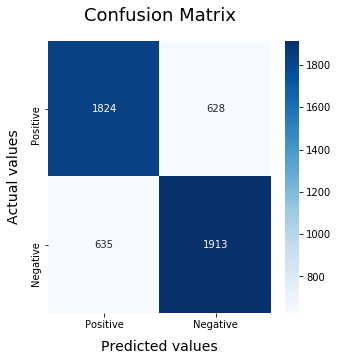

In [83]:
evaluate_model(lr)

### Support Vector Classifier

In [85]:
from sklearn import svm

In [86]:
svc = svm.SVC()
svc.fit(X_train_1,y_train)

SVC()

In [87]:
y_pred = svc.predict(X_test_1)

              precision    recall  f1-score   support

    Negative       0.72      0.74      0.73      2419
    Positive       0.75      0.74      0.74      2581

    accuracy                           0.74      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.74      0.74      0.74      5000

**************************************************
Accuracy Score : 0.7372
**************************************************


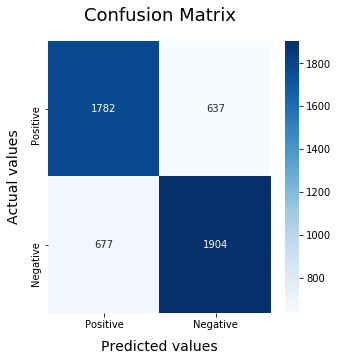

In [88]:
evaluate_model(svc)

Thanks